In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from collections import defaultdict

# sns.set_style("whitegrid")
sns.set(style={'style': "whitegrid", 'axes.grid' : False}, font_scale=1.5)

In [2]:
import os
os.getcwd()

'C:\\Users\\isvandroffelaa\\Documents\\model\\adaptive_policies\\analysis'

In [3]:
num_units = 3
num_sensors = 3
run_length = 1800
rbf_shape = 'linear'
numrbf = 2
nfe = 10000

city='Manhattan'

In [4]:
# results_reopt = pd.read_csv(f'../reopt/results/HPC_results/manhattan/nfe{nfe}/results_N10_R100_U{num_units}_S{num_sensors}_upto1.csv')
results_reopt = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]: 
        for instance in range(10):
            try: 
                results_ = pd.read_csv(f'../reopt/results/HPC_results/city/results_sp_const_{city}_R100_U{num_units}_S{num_sensors}_limitednfe_instance{instance}.csv')
                results_reopt = pd.concat([results_reopt, results_])
            except: 
                print(num_units, num_sensors, instance)

In [5]:
results_reopt

,n_realizations,num_units,num_sensors,instance,pct_intercepted
0,100.0,3.0,3.0,0.0,0.61
0,100.0,3.0,3.0,0.0,0.61
1,100.0,3.0,3.0,1.0,0.57
0,100.0,3.0,3.0,0.0,0.61
1,100.0,3.0,3.0,1.0,0.57
...,...,...,...,...,...
5,100.0,10.0,10.0,5.0,0.98
6,100.0,10.0,10.0,6.0,0.96
7,100.0,10.0,10.0,7.0,0.87
8,100.0,10.0,10.0,8.0,0.91


In [6]:
results_oneshot = defaultdict(dict)
for num_units in [3, 10]:
    for num_sensors in [3, 10]: 
        try: 
            results_ = pd.read_pickle(f'../reopt/results/city/sp_const_nosensorinfo_{city}_pctintercepted_R100_U{num_units}_numsensors{num_sensors}.pkl')
            results_oneshot[num_units, num_sensors] = results_
        except: 
            print(num_units, num_sensors)

In [7]:
results_oneshot

defaultdict(dict,
            {(3, 3): {0: 0.57,
              1: 0.59,
              2: 0.74,
              3: 0.18,
              4: 0.43,
              5: 0.47,
              6: 0.57,
              7: 0.48,
              8: 0.66,
              9: 0.67},
             (3, 10): {0: 0.57,
              1: 0.58,
              2: 0.74,
              3: 0.18,
              4: 0.43,
              5: 0.47,
              6: 0.57,
              7: 0.49,
              8: 0.64,
              9: 0.65},
             (10, 3): {0: 0.98,
              1: 0.89,
              2: 0.98,
              3: 0.99,
              4: 0.9,
              5: 1.0,
              6: 0.98,
              7: 1.0,
              8: 0.99,
              9: 0.71},
             (10, 10): {0: 0.97,
              1: 0.99,
              2: 1.0,
              3: 0.98,
              4: 0.99,
              5: 1.0,
              6: 1.0,
              7: 0.99,
              8: 0.98,
              9: 0.71}})

In [8]:
# path = f"../DPS/grid/results_HPC/10k nfe/*R100*U{num_units}*S{num_sensors}*{rbf_shape}*.csv"

files = []
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        path = f"../DPS/city/results_HPC/sp_const_*{city}*R100*U{num_units}*S{num_sensors}*{rbf_shape}*numrbf{numrbf}*.csv"
        files.extend(glob.glob(path))

len(files)

371

In [9]:
results_DPS = pd.DataFrame()

for file in files:
    results_per_file = pd.DataFrame()
    # best score = file content
    imported_df = pd.read_csv(file)
    
    results_per_file['nfe'] = imported_df['nfe']
    results_per_file['intercepted'] = 1 - imported_df['not_intercepted']

    # extract S, U, seed from filename using .split()
    split1 = file.replace("\\", "_")
    split2 = split1.replace(".", "_")
    split3 = split2.split("_")

    num_sensors = 3
    for seq in split3:
        if "seed" in seq: 
            _, seed = seq.split("seed")
        elif "instance" in seq:
            _, instance = seq.split("instance")
        elif "U" in seq: 
            _, num_units = seq.split("U")
        elif "numrbf" in seq:
            _, num_rbf = seq.split("numrbf")
        elif "S" in seq:
            _, num_sensors = seq.split("S")

            
    if "cubic" in split3: 
        rbf = "cubic"
    elif "gaussian" in split3:
        rbf = "gaussian"
    elif "linear" in split3:
        rbf = "linear"
            
    results_per_file['seed'] = int(seed)
    results_per_file['instance'] = int(instance)
    results_per_file['num_units'] = int(num_units)
    results_per_file['num_sensors'] = int(num_sensors)
    results_per_file['rbf'] = rbf
    results_per_file['numrbf'] = int(num_rbf)
    results_per_file['instance/seed'] = str(instance) + ', ' + str(seed)
    
#     results_per_file['num_units_num_sensors'] = f"{num_units}_{num_sensors}"
#     results_per_file['US_seed'] = f"{num_units}_{num_sensors}_{seed}"
    
    results_DPS = pd.concat([results_DPS, results_per_file])

In [10]:
results_DPS

,nfe,intercepted,seed,instance,num_units,num_sensors,rbf,numrbf,instance/seed
0,100,0.43,0,0,3,3,linear,2,"0, 0"
1,10043,0.62,0,0,3,3,linear,2,"0, 0"
2,1169,0.47,0,0,3,3,linear,2,"0, 0"
3,1363,0.47,0,0,3,3,linear,2,"0, 0"
4,1556,0.47,0,0,3,3,linear,2,"0, 0"
...,...,...,...,...,...,...,...,...,...
48,9139,0.61,9,9,10,10,linear,2,"9, 9"
49,9334,0.61,9,9,10,10,linear,2,"9, 9"
50,9531,0.61,9,9,10,10,linear,2,"9, 9"
51,9725,0.61,9,9,10,10,linear,2,"9, 9"


In [11]:
best_scores = defaultdict(dict)
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_DPS.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                best_scores[num_units, num_sensors, instance] = max(results_subset['intercepted'])
            except: 
                pass

In [12]:
best_scores

defaultdict(dict,
            {(3, 3, 0): 0.63,
             (3, 3, 1): 0.64,
             (3, 3, 2): 0.75,
             (3, 3, 3): 0.17000000000000004,
             (3, 3, 4): 0.41000000000000003,
             (3, 3, 5): 0.47,
             (3, 3, 6): 0.63,
             (3, 3, 7): 0.51,
             (3, 3, 8): 0.6599999999999999,
             (3, 3, 9): 0.74,
             (3, 10, 0): 0.6799999999999999,
             (3, 10, 1): 0.65,
             (3, 10, 2): 0.76,
             (3, 10, 3): 0.15000000000000002,
             (3, 10, 4): 0.4,
             (3, 10, 5): 0.47,
             (3, 10, 6): 0.6699999999999999,
             (3, 10, 7): 0.6,
             (3, 10, 8): 0.64,
             (3, 10, 9): 0.6699999999999999,
             (10, 3, 0): 0.99,
             (10, 3, 1): 1.0,
             (10, 3, 2): 1.0,
             (10, 3, 4): 1.0,
             (10, 3, 5): 1.0,
             (10, 3, 7): 1.0,
             (10, 3, 8): 1.0,
             (10, 3, 9): 0.72,
             (10, 10, 0): 0.96,

In [13]:
# scale score to optimum found with MIP solver
scaled_result_list = []
for index, row in results_DPS.iterrows():
    best_score_at_row = best_scores[row['num_units'], row['num_sensors'], row['instance']]
    scaled_score = row['intercepted'] / best_score_at_row
    scaled_result_list.append(scaled_score)

results_DPS['scaled score'] = scaled_result_list

In [14]:
results_DPS

,nfe,intercepted,seed,instance,num_units,num_sensors,rbf,numrbf,instance/seed,scaled score
0,100,0.43,0,0,3,3,linear,2,"0, 0",0.682540
1,10043,0.62,0,0,3,3,linear,2,"0, 0",0.984127
2,1169,0.47,0,0,3,3,linear,2,"0, 0",0.746032
3,1363,0.47,0,0,3,3,linear,2,"0, 0",0.746032
4,1556,0.47,0,0,3,3,linear,2,"0, 0",0.746032
...,...,...,...,...,...,...,...,...,...,...
48,9139,0.61,9,9,10,10,linear,2,"9, 9",0.847222
49,9334,0.61,9,9,10,10,linear,2,"9, 9",0.847222
50,9531,0.61,9,9,10,10,linear,2,"9, 9",0.847222
51,9725,0.61,9,9,10,10,linear,2,"9, 9",0.847222


In [15]:
results_PTO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_PTO_instance = pd.read_csv(f'C:/Users/isvandroffelaa/Documents/model/adaptive_policies/ptreeoptperunit/fugitive_interceptions/results_HPC/city/results_{city}__R100_U{num_units}_numsensors{num_sensors}_instance{instance}.csv')
                results_PTO_instance['intercepted'] = 1 - results_PTO_instance['best_f']
                
                results_PTO=pd.concat([results_PTO, results_PTO_instance], ignore_index=True)
            except:
                print(num_units, num_sensors, instance)

In [16]:
results_PTO

,nfe,time,best_f,best_P,instance,seed,num_units,num_sensors,intercepted
0,100,11,0.64,[<ptreeopt.tree.PTree object at 0x155517b62970...,0,0,3,3,0.36
1,200,21,0.62,[<ptreeopt.tree.PTree object at 0x155516db7430...,0,0,3,3,0.38
2,300,31,0.52,[<ptreeopt.tree.PTree object at 0x155516c72c40...,0,0,3,3,0.48
3,400,40,0.52,[<ptreeopt.tree.PTree object at 0x155516c72c40...,0,0,3,3,0.48
4,500,50,0.52,[<ptreeopt.tree.PTree object at 0x155516c72c40...,0,0,3,3,0.48
...,...,...,...,...,...,...,...,...,...
19995,9600,4335,0.11,[<ptreeopt.tree.PTree object at 0x155517b2e850...,9,4,10,10,0.89
19996,9700,4381,0.11,[<ptreeopt.tree.PTree object at 0x155517b2e850...,9,4,10,10,0.89
19997,9800,4426,0.11,[<ptreeopt.tree.PTree object at 0x155517b2e850...,9,4,10,10,0.89
19998,9900,4473,0.11,[<ptreeopt.tree.PTree object at 0x155517b2e850...,9,4,10,10,0.89


# Comparison boxplots

In [17]:
results_best_DPS = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_DPS.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance} & rbf == "{rbf}" & numrbf == {numrbf}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['intercepted'])]
                
                results_best_DPS = pd.concat([results_best_DPS, df_seed], ignore_index=True)
            except:
                pass  # result not finished yet
results_best_DPS['approach'] = 'DPS'

In [18]:
results_best_DPS

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.63,DPS
1,3,3,1,0.64,DPS
2,3,3,2,0.75,DPS
3,3,3,3,0.17,DPS
4,3,3,4,0.41,DPS
5,3,3,5,0.47,DPS
6,3,3,6,0.63,DPS
7,3,3,7,0.51,DPS
8,3,3,8,0.66,DPS
9,3,3,9,0.74,DPS


In [19]:
results_best_PTO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:                
                results_subset = results_PTO.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['intercepted'])]
                
                results_best_PTO = pd.concat([results_best_PTO, df_seed], ignore_index=True)
            except:
                print(num_units, num_sensors, instance)
results_best_PTO['approach'] = 'PTO'

In [20]:
results_best_PTO

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.58,PTO
1,3,3,1,0.56,PTO
2,3,3,2,0.74,PTO
3,3,3,3,0.18,PTO
4,3,3,4,0.41,PTO
5,3,3,5,0.47,PTO
6,3,3,6,0.57,PTO
7,3,3,7,0.49,PTO
8,3,3,8,0.65,PTO
9,3,3,9,0.68,PTO


In [21]:
results_best_oneshot = pd.DataFrame()
for key, instance_score in results_oneshot.items():
    for instance, score in instance_score.items():
        df_seed = pd.DataFrame()
        df_seed['num_units'] = [key[0]]
        df_seed['num_sensors'] = [key[1]]
        df_seed['instance'] = [instance]
        df_seed['best_score'] = [score]
    
        results_best_oneshot = pd.concat([results_best_oneshot, df_seed], ignore_index=True)
results_best_oneshot['approach'] = 'one-shot'

In [22]:
results_best_PRO = pd.DataFrame()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            try:
                results_subset = results_reopt.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
                df_seed = pd.DataFrame()
                df_seed['num_units'] = [num_units]
                df_seed['num_sensors'] = [num_sensors]
                df_seed['instance'] = [instance]
                df_seed['best_score'] = [max(results_subset['pct_intercepted'])]
                
                results_best_PRO = pd.concat([results_best_PRO, df_seed], ignore_index=True)
            except: 
                print(num_units, num_sensors, instance)
                pass
results_best_PRO['approach'] = 'PRO'

In [23]:
results = pd.concat([results_best_oneshot, results_best_PRO, results_best_PTO, results_best_DPS])

In [24]:
results

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.57,one-shot
1,3,3,1,0.59,one-shot
2,3,3,2,0.74,one-shot
3,3,3,3,0.18,one-shot
4,3,3,4,0.43,one-shot
...,...,...,...,...,...
33,10,10,5,1.00,DPS
34,10,10,6,1.00,DPS
35,10,10,7,0.99,DPS
36,10,10,8,1.00,DPS


In [25]:
# scale to best score across approaches
best_score_across_approaches = dict()
for num_units in [3, 10]:
    for num_sensors in [3, 10]:
        for instance in range(10):
            results_subset = results.query(f'num_units == {num_units} & num_sensors == {num_sensors} & instance == {instance}')
            best_score_across_approaches[num_units, num_sensors, instance] = max(results_subset['best_score'])

In [26]:
best_score_across_approaches

{(3, 3, 0): 0.63,
 (3, 3, 1): 0.64,
 (3, 3, 2): 0.75,
 (3, 3, 3): 0.18000000000000005,
 (3, 3, 4): 0.43,
 (3, 3, 5): 0.47,
 (3, 3, 6): 0.63,
 (3, 3, 7): 0.51,
 (3, 3, 8): 0.68,
 (3, 3, 9): 0.74,
 (3, 10, 0): 0.6799999999999999,
 (3, 10, 1): 0.65,
 (3, 10, 2): 0.76,
 (3, 10, 3): 0.18000000000000005,
 (3, 10, 4): 0.48,
 (3, 10, 5): 0.47,
 (3, 10, 6): 0.6699999999999999,
 (3, 10, 7): 0.62,
 (3, 10, 8): 0.64,
 (3, 10, 9): 0.6699999999999999,
 (10, 3, 0): 0.99,
 (10, 3, 1): 1.0,
 (10, 3, 2): 1.0,
 (10, 3, 3): 0.99,
 (10, 3, 4): 1.0,
 (10, 3, 5): 1.0,
 (10, 3, 6): 0.98,
 (10, 3, 7): 1.0,
 (10, 3, 8): 1.0,
 (10, 3, 9): 0.72,
 (10, 10, 0): 0.97,
 (10, 10, 1): 0.99,
 (10, 10, 2): 1.0,
 (10, 10, 3): 1.0,
 (10, 10, 4): 0.99,
 (10, 10, 5): 1.0,
 (10, 10, 6): 1.0,
 (10, 10, 7): 0.99,
 (10, 10, 8): 1.0,
 (10, 10, 9): 0.89}

In [98]:
results

,num_units,num_sensors,instance,best_score,approach
0,3,3,0,0.75,one-shot
1,3,3,1,0.62,one-shot
2,3,3,2,0.79,one-shot
3,3,3,3,0.86,one-shot
4,3,3,4,0.57,one-shot
...,...,...,...,...,...
33,10,10,4,0.98,DPS
34,10,10,6,1.00,DPS
35,10,10,7,1.00,DPS
36,10,10,8,1.00,DPS


In [99]:
scaled_result_list = []
for index, row in results.iterrows():
    best_score_at_row = best_score_across_approaches[row['num_units'], row['num_sensors'], row['instance']]
    scaled_score = row['best_score'] / best_score_at_row
    scaled_result_list.append(scaled_score)

results['scaled score'] = scaled_result_list

In [100]:
results['|U|, |S|'] = results['num_units'].astype(int).astype(str) + ', ' + results['num_sensors'].astype(int).astype(str)

In [101]:
results

,num_units,num_sensors,instance,best_score,approach,scaled score,"|U|, |S|"
0,3,3,0,0.75,one-shot,0.937500,"3, 3"
1,3,3,1,0.62,one-shot,0.775000,"3, 3"
2,3,3,2,0.79,one-shot,0.963415,"3, 3"
3,3,3,3,0.86,one-shot,1.000000,"3, 3"
4,3,3,4,0.57,one-shot,0.934426,"3, 3"
...,...,...,...,...,...,...,...
33,10,10,4,0.98,DPS,0.980000,"10, 10"
34,10,10,6,1.00,DPS,1.000000,"10, 10"
35,10,10,7,1.00,DPS,1.000000,"10, 10"
36,10,10,8,1.00,DPS,1.000000,"10, 10"


In [102]:
sns.set_style("whitegrid", {'axes.grid' : False})
my_palette=['silver', 'tab:green', 'tab:red', 'tab:blue']

In [103]:

# ax = sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', aspect=1.4, linewidth=1)
# 
# plt.ylim(0, 1.05)
# 
# 
# plt.savefig(f'figs/{city}_compare_approaches_multiUS_boxplot.png', dpi=300)

In [104]:
# sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=1.4)
# plt.ylim(0, 1.05)
# for x in range(0, len(results['|U|, |S|'].unique()) - 1):
#   plt.plot([x + 0.5, x + 0.5], [0.42, 0.98], ':', c='lightgray', linewidth=1)
# plt.savefig(f'figs/{city}_compare_approaches_multiUS_swarmplot.png', dpi=300)

In [105]:
# # plt.rc_context({"xtick.major.pad": 0})
# 
# sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=2.8)
# # ww: 3, mh: 2.4, 
# plt.ylim(0, 1.05)
# for x in range(0, len(results['|U|, |S|'].unique())):
#     plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
# plt.savefig(f'figs/{city}_compare_approaches_multiUS_swarmplot.png', dpi=300)

In [106]:
# ax = sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, aspect=2.6)
# # ww: 2.6, mh: 1.8
# plt.ylim(0, 1.05)
# ax.set(ylabel='score')
# for x in range(0, len(results['|U|, |S|'].unique())):
#     plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
# plt.savefig(f'figs/{city}_compare_approaches_notscaled_limitednfe_swarmplot.png', dpi=300)

In [107]:
# ax = sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, col='instance', kind='swarm', dodge=True)
# # ww: 2.6, mh: 1.8
# plt.ylim(0, 1.05)
# ax.set(ylabel='score')
# for x in range(0, len(results['|U|, |S|'].unique())):
#     plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])
# plt.savefig(f'figs/{city}_compare_approaches_notscaled_swarmplot_perinstance.png', dpi=300)

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_24784\3014077161.py:1: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', linewidth=1, boxprops={'alpha': 0.4}, gap=.2, aspect=2.7, whis=0, showfliers=False, linecolor='gray', showcaps = False, fill=False, medianprops=dict(linewidth=2), legend=False)
C:\Users\isvandroffelaa\Documents\model\adaptive_policies\DPS\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


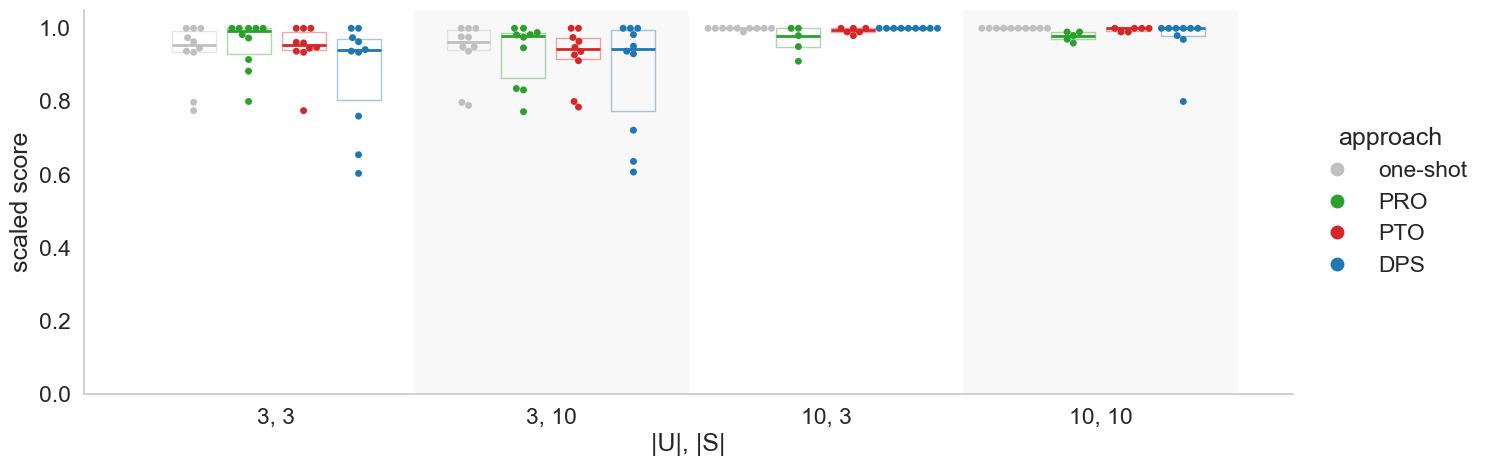

In [108]:
sns.catplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='box', linewidth=1, boxprops={'alpha': 0.4}, gap=.2, aspect=2.7, whis=0, showfliers=False, linecolor='gray', showcaps = False, fill=False, medianprops=dict(linewidth=2), legend=False)
# sns.boxplot(results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, gap=.2, boxprops={'alpha': 0.4})
ax = sns.swarmplot(data=results, y='scaled score', x = '|U|, |S|', hue='approach', palette=my_palette, dodge=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 0.75), markerscale=2, frameon=False)  

# g.map(sns.catplot(results, y='best_score', x = '|U|, |S|', hue='approach', palette=my_palette, kind='swarm', dodge=True, ))
# ww: 2.6, mh: 1.8
plt.ylim(0, 1.05)
ax.set(ylabel='scaled score')
for x in range(0, len(results['|U|, |S|'].unique())):
    plt.axvspan(x - 0.5, x + 0.5, facecolor='gray', alpha=[0 if x%2 == 0 else 0.05][0])

plt.savefig(f'figs/{city}_compare_approaches_multiUS_boxplot_limitednfe.png', dpi=300, bbox_inches='tight')

In [109]:
pd.read_pickle(f'../reopt/results/num_reopt_grid.pkl')

{(3, 3): 2.117,
 (3, 10): 3.2119999999999997,
 (10, 3): 2.205,
 (10, 10): 3.1640000000000006}

In [110]:
pd.read_pickle(f'../reopt/results/num_reopt_Manhattan.pkl')

{(3, 3): 3.3930000000000007,
 (3, 10): 5.235,
 (10, 3): 3.913000000000001,
 (10, 10): 5.479999999999999}

In [111]:
pd.read_pickle(f'../reopt/results/num_reopt_Utrecht.pkl')

{(3, 3): 4.132,
 (3, 10): 6.419000000000001,
 (10, 3): 3.7950000000000004,
 (10, 10): 6.654999999999999}

In [112]:
pd.read_pickle(f'../reopt/results/num_reopt_Winterswijk.pkl')

{(3, 3): 2.5210000000000004,
 (3, 10): 5.526000000000001,
 (10, 3): 3.7550000000000003,
 (10, 10): 4.814}